# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import string
import nltk
import re
import textblob
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

# Reading Dataset

In [2]:
dataset= pd.read_csv("responses (1).csv",low_memory=False)

In [3]:
dataset.head()

,#,Start Time:,Client Email:,Client Type:,Client Name:,Contact First Name:,Issue Type,Client Country:,Other,Client Industry,...,Unnamed: 674,Unnamed: 675,Unnamed: 676,Unnamed: 677,Unnamed: 678,Unnamed: 679,Unnamed: 680,Unnamed: 681,Unnamed: 682,Unnamed: 683
0,8f0n4ukco8jbhuj2w6yxi8f0n4q5vbgu,838,saira.mirzan@gmail.com,Personal,Saira Mirzan,Saira,False & Negative,Australia,NaN,Individual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bn1rds8ti23m5er844tro2bn1rds8cvz,739,kristy@incyinteriors.com,Business,Kristy Withers,Kristy,False & Negative,Australia,NaN,Professional Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,w92aklujazk69jjj81ciw92akldvbog8,datodrsiva@gvcoad.com,datodrsiva@gvcoad.com,NaN,Dato' Dr Siva Ananthan,Dato,False & Negative,Malaysia,NaN,Professional Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,t8h9e3jvhj1nt8h96pqm77pg9f6oz6b1,945,datodrsiva@gvcoad.com,Personal,Dato' Dr Siva Ananthan,Dato,False & Negative,Malaysia,NaN,Professional Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,qrbqhpg6e9p8qrb9rfetw9p2f7n4kmlr,230,marketing@vidaskinclinic.com,Business,Shermane Chua,Shermane,False & Negative,Singapore,NaN,Professional Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Selecting Columns required to perform Sentiment Analysis from dataset

In [4]:
df=dataset[['CONTENT']]
df.head()

,CONTENT
0,SINGH UTSG Creditors & Victims Group @roselyns...
1,So disappointed with our Incy Interiors experi...
2,(Translated by Google) Feel that the classroom...
3,Look at all my stars!! ******* Senior Member 2...
4,1 STAR REVIEW BY CD


# Dropping  Null Values from Column

In [5]:
df=df.dropna( axis=0, how="any", thresh=None, subset=None, inplace=False)

In [6]:
df

,CONTENT
0,SINGH UTSG Creditors & Victims Group @roselyns...
1,So disappointed with our Incy Interiors experi...
2,(Translated by Google) Feel that the classroom...
3,Look at all my stars!! ******* Senior Member 2...
4,1 STAR REVIEW BY CD
...,...
2596,Hi everyone l have a black series sergeant cou...
2597,"Narcissist, Charmer, Lies & Manipulates, Cheat..."
2598,Two IT consultants who carried scales inside a...
2599,Two IT consultants who carried scales inside a...


# Cleaning Text

In [7]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing urls
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # removing punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [8]:
df['CONTENT']= df['CONTENT'].apply(wordopt)

In [9]:
df['CONTENT']

0       singh utsg creditors   victims group  roselyns...
1       so disappointed with our incy interiors experi...
2        translated by google  feel that the classroom...
3       look at all my stars           senior member  ...
4                                       star review by cd
                              ...                        
2596    hi everyone l have a black series sergeant cou...
2597    narcissist  charmer  lies   manipulates  cheat...
2598    two it consultants who carried scales inside a...
2599    two it consultants who carried scales inside a...
2600                                          test com au
Name: CONTENT, Length: 2576, dtype: object

# Part of Speech Tagging

In [10]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['CONTENT'].apply(token_stop_pos)
df.head()

,CONTENT,POS tagged
0,singh utsg creditors victims group roselyns...,"[(singh, n), (utsg, a), (creditors, n), (victi..."
1,so disappointed with our incy interiors experi...,"[(disappointed, a), (incy, n), (interiors, n),..."
2,translated by google feel that the classroom...,"[(translated, v), (google, n), (feel, n), (cla..."
3,look at all my stars senior member ...,"[(look, n), (stars, n), (senior, a), (member, ..."
4,star review by cd,"[(star, n), (review, n), (cd, n)]"


# Lemmatization

In [11]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,CONTENT,POS tagged,Lemma
0,singh utsg creditors victims group roselyns...,"[(singh, n), (utsg, a), (creditors, n), (victi...",singh utsg creditor victim group roselynsing...
1,so disappointed with our incy interiors experi...,"[(disappointed, a), (incy, n), (interiors, n),...",disappointed incy interior experience produc...
2,translated by google feel that the classroom...,"[(translated, v), (google, n), (feel, n), (cla...",translate google feel classroom small origin...
3,look at all my stars senior member ...,"[(look, n), (stars, n), (senior, a), (member, ...",look star senior member post join sep hello ...
4,star review by cd,"[(star, n), (review, n), (cd, n)]",star review cd


# Text Vocab

In [20]:
allwords=' '.join([contents for contents in df['CONTENT']])
tokens=allwords.split()
vocab=sorted(set(tokens))

In [21]:
print(vocab)

['a', 'aa', 'aadal', 'aadhi', 'aai', 'aan', 'aandeel', 'aandeelhouder', 'aandelen', 'aangepast', 'aangfite', 'aangifte', 'aankoop', 'aanrader', 'aantal', 'aanzetten', 'aardig', 'aaron', 'aass', 'aavip', 'ab', 'aback', 'abam', 'abandon', 'abandoned', 'abbas', 'abbie', 'abbotsford', 'abbottabad', 'abc', 'abd', 'abducted', 'abduction', 'abdul', 'abdullah', 'abetting', 'abgebrochen', 'abhorrent', 'abihay', 'abilities', 'ability', 'abiso', 'abit', 'able', 'abn', 'abnormalities', 'abnormally', 'abolish', 'abonyi', 'aboriginal', 'abortion', 'about', 'abouts', 'above', 'abovementioned', 'abovesaid', 'abrams', 'abrasive', 'abril', 'abroad', 'abrupt', 'abruptly', 'abs', 'absco', 'abscond', 'absence', 'absent', 'absolute', 'absolutely', 'absolutesoulsecrets', 'absoluut', 'absorb', 'absorbed', 'abstaining', 'abstract', 'absurd', 'abu', 'abundance', 'abuse', 'abused', 'abuser', 'abusers', 'abuses', 'abusing', 'abusive', 'abysmal', 'ac', 'aca', 'academic', 'academically', 'academy', 'acc', 'accc', '

In [ ]:
with open("file.txt", "w") as output:
    output.write(str(vocab))

# Total Words in Vocab

In [25]:
count=len(tokens)
count

404974

In [31]:
fin_data = pd.DataFrame(df[['CONTENT','POS tagged','Lemma']])

# Most Common Words in Dataset

In [32]:
from collections import Counter
def wordCloudFunction(df,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in fin_data['Lemma'] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

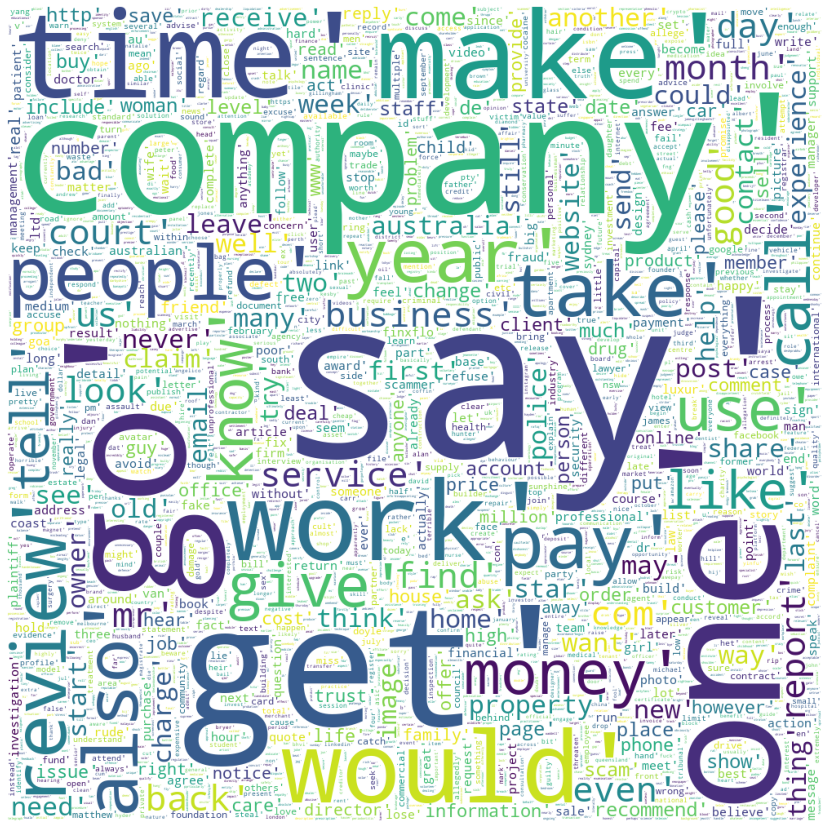

In [33]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
wordCloudFunction(dataset,10000000)

# Performing Sentiment Analysis Using TextBlob

In [34]:
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
        return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [36]:
df['Subjectivity'] = df['CONTENT'].apply(getSubjectivity) 
df['Polarity'] = df['CONTENT'].apply(getPolarity) 
df['TextBlob_Sentiment'] = df['Polarity'].apply(analysis)
df.head()

,CONTENT,POS tagged,Lemma,Subjectivity,Polarity,TextBlob_Sentiment
0,singh utsg creditors victims group roselyns...,"[(singh, n), (utsg, a), (creditors, n), (victi...",singh utsg creditor victim group roselynsing...,0.000000,0.000000,Neutral
1,so disappointed with our incy interiors experi...,"[(disappointed, a), (incy, n), (interiors, n),...",disappointed incy interior experience produc...,0.604885,0.062163,Positive
2,translated by google feel that the classroom...,"[(translated, v), (google, n), (feel, n), (cla...",translate google feel classroom small origin...,0.635000,0.025000,Positive
3,look at all my stars senior member ...,"[(look, n), (stars, n), (senior, a), (member, ...",look star senior member post join sep hello ...,0.442626,0.154343,Positive
4,star review by cd,"[(star, n), (review, n), (cd, n)]",star review cd,0.000000,0.000000,Neutral


# Total Counts of sentiments using TextBlob

In [38]:
tb_counts = df['TextBlob_Sentiment'].value_counts()

tb_counts

Positive    1064
Negative     780
Neutral      732
Name: TextBlob_Sentiment, dtype: int64

# Performing Sentiment Analysis Using Vader Sentiment Analyzer

In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df['Vader Sentiment'] = df['CONTENT'].apply(vadersentimentanalysis)


In [40]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df['Vader Analysis'] = df['Vader Sentiment'].apply(vader_analysis)
df.head()

,CONTENT,POS tagged,Lemma,Subjectivity,Polarity,TextBlob_Sentiment,Vader Sentiment,Vader Analysis
0,singh utsg creditors victims group roselyns...,"[(singh, n), (utsg, a), (creditors, n), (victi...",singh utsg creditor victim group roselynsing...,0.000000,0.000000,Neutral,-0.3182,Neutral
1,so disappointed with our incy interiors experi...,"[(disappointed, a), (incy, n), (interiors, n),...",disappointed incy interior experience produc...,0.604885,0.062163,Positive,0.9099,Positive
2,translated by google feel that the classroom...,"[(translated, v), (google, n), (feel, n), (cla...",translate google feel classroom small origin...,0.635000,0.025000,Positive,0.3774,Neutral
3,look at all my stars senior member ...,"[(look, n), (stars, n), (senior, a), (member, ...",look star senior member post join sep hello ...,0.442626,0.154343,Positive,0.9330,Positive
4,star review by cd,"[(star, n), (review, n), (cd, n)]",star review cd,0.000000,0.000000,Neutral,0.0000,Neutral


# Total Counts of sentiments using Vader

In [41]:
vader_counts = df['Vader Analysis'].value_counts()
vader_counts


Neutral     1232
Negative     872
Positive     472
Name: Vader Analysis, dtype: int64

# Performing Sentiment Analysis Using sentiwordnet

In [42]:
#nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

df['SWN analysis'] = df['POS tagged'].apply(sentiwordnetanalysis)
df.head()

,CONTENT,POS tagged,Lemma,Subjectivity,Polarity,TextBlob_Sentiment,Vader Sentiment,Vader Analysis,SWN analysis
0,singh utsg creditors victims group roselyns...,"[(singh, n), (utsg, a), (creditors, n), (victi...",singh utsg creditor victim group roselynsing...,0.000000,0.000000,Neutral,-0.3182,Neutral,Neutral
1,so disappointed with our incy interiors experi...,"[(disappointed, a), (incy, n), (interiors, n),...",disappointed incy interior experience produc...,0.604885,0.062163,Positive,0.9099,Positive,Positive
2,translated by google feel that the classroom...,"[(translated, v), (google, n), (feel, n), (cla...",translate google feel classroom small origin...,0.635000,0.025000,Positive,0.3774,Neutral,Negative
3,look at all my stars senior member ...,"[(look, n), (stars, n), (senior, a), (member, ...",look star senior member post join sep hello ...,0.442626,0.154343,Positive,0.9330,Positive,Positive
4,star review by cd,"[(star, n), (review, n), (cd, n)]",star review cd,0.000000,0.000000,Neutral,0.0000,Neutral,Positive


In [43]:
df

,CONTENT,POS tagged,Lemma,Subjectivity,Polarity,TextBlob_Sentiment,Vader Sentiment,Vader Analysis,SWN analysis
0,singh utsg creditors victims group roselyns...,"[(singh, n), (utsg, a), (creditors, n), (victi...",singh utsg creditor victim group roselynsing...,0.000000,0.000000,Neutral,-0.3182,Neutral,Neutral
1,so disappointed with our incy interiors experi...,"[(disappointed, a), (incy, n), (interiors, n),...",disappointed incy interior experience produc...,0.604885,0.062163,Positive,0.9099,Positive,Positive
2,translated by google feel that the classroom...,"[(translated, v), (google, n), (feel, n), (cla...",translate google feel classroom small origin...,0.635000,0.025000,Positive,0.3774,Neutral,Negative
3,look at all my stars senior member ...,"[(look, n), (stars, n), (senior, a), (member, ...",look star senior member post join sep hello ...,0.442626,0.154343,Positive,0.9330,Positive,Positive
4,star review by cd,"[(star, n), (review, n), (cd, n)]",star review cd,0.000000,0.000000,Neutral,0.0000,Neutral,Positive
...,...,...,...,...,...,...,...,...,...
2596,hi everyone l have a black series sergeant cou...,"[(hi, n), (everyone, n), (l, n), (black, a), (...",hi everyone l black series sergeant could ne...,0.345353,0.002618,Positive,-0.3716,Neutral,Negative
2597,narcissist charmer lies manipulates cheat...,"[(narcissist, a), (charmer, n), (lies, v), (ma...",narcissist charmer lie manipulate cheat man ...,0.452597,0.083604,Positive,0.8320,Positive,Positive
2598,two it consultants who carried scales inside a...,"[(two, None), (consultants, n), (carried, v), ...",two consultant carry scale inside louis vuit...,0.666667,-0.200000,Negative,-0.1531,Neutral,Negative
2599,two it consultants who carried scales inside a...,"[(two, None), (consultants, n), (carried, v), ...",two consultant carry scale inside louis vuit...,0.666667,-0.200000,Negative,-0.1531,Neutral,Negative


In [60]:
df.to_csv("ReviewSentimentAnalysis.csv")

# Total Counts of sentiments using SWN

In [45]:
swn_counts= df['SWN analysis'].value_counts()
swn_counts

Negative    1080
Positive    1035
Neutral      445
0             16
Name: SWN analysis, dtype: int64

# Visualising Results of three techniques

([<matplotlib.patches.Wedge at 0x2ed5dbfcc10>,
 [Text(0.27605291109342184, 1.06479800444819, 'Negative'),
  Text(-0.8011672327194386, -0.753744694984102, 'Positive'),
  Text(0.9190638529749181, -0.604418426385975, 'Neutral'),
  Text(1.3497429952631632, -0.02634097071152263, '0')],
 [Text(0.15057431514186642, 0.5807989115171944, '41.9%'),
  Text(-0.43700030875605733, -0.4111334699913283, '40.2%'),
  Text(0.5013075561681372, -0.3296827780287136, '17.3%'),
  Text(0.8498381822027322, -0.016585055633180915, '0.6%')])

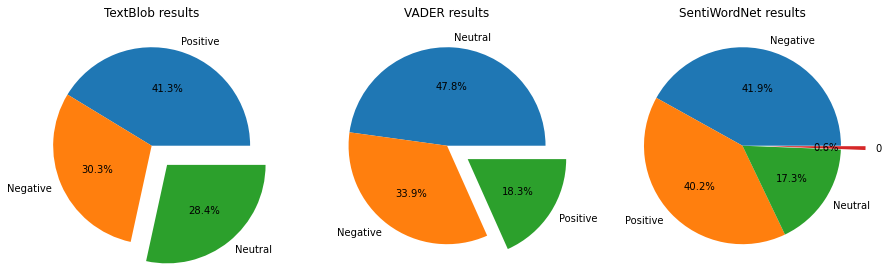

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0,0, 0.25), autopct='%1.1f%%', shadow=False)

# Performing Sentiment Analysis on user input URL

In [47]:
from selenium import webdriver
from time import sleep

In [48]:
url = input("\nPlease enter URL  here  : ").strip()


Please enter URL  here  : https://goo.gl/maps/gT5TA8oqkCw


In [49]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.chrome.options import Options
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
options = Options()
options.add_argument('--headless')
options.add_argument('--disable-gpu')  # Last I checked this was necessary.
driver=webdriver.Chrome("./chromedriver")
driver.get(url)
sleep(2)
review=driver.find_element_by_xpath("/html/body/div[3]/div[9]/div[8]/div/div[1]/div/div/div[2]/div[4]/div/div[3]/div[3]/div[2]/span[2]").text

<ipython-input-49-9a7e293e1396>:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome("./chromedriver")
<ipython-input-49-9a7e293e1396>:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  review=driver.find_element_by_xpath("/html/body/div[3]/div[9]/div[8]/div/div[1]/div/div/div[2]/div[4]/div/div[3]/div[3]/div[2]/span[2]").text


## Text Extracted from URL

In [50]:
review

'unprofessional and inappropriate'

## Result obtained from Vader

In [51]:
vs2=analyzer.polarity_scores(review)
vs2=vs2['compound']

In [52]:
def vader_analysises(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

In [53]:
vader_result=vader_analysises(vs2)

In [54]:
print(vader_result)

Negative


## Result obtained from Text Blob

In [55]:
sub=TextBlob(review).sentiment.subjectivity
pol=TextBlob(review).sentiment.polarity
text_blob=analysis(pol)

In [56]:
print(text_blob)

Neutral


## Result obtained from SW

In [57]:
sw=token_stop_pos(review)
sw_senti=sentiwordnetanalysis(sw)

In [58]:
print(sw_senti)

Negative
